### Applying functions in pandas

If you work with large data frames going over a list of elements or a series is not efficient and probably slow. It is more effective to make use of functions in pandas. To this end, we will make use of the __apply( )__ function.

In [10]:
import pandas as pd
import os
from pathlib import Path
data_dir = os.path.join(Path(os.getcwd()).parents[2], "data", "ntbk_data", "04_data")
df = pd.read_csv(os.path.join(data_dir, 'suicide_data.csv'))

In [11]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [12]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [13]:
def suicide_rating(x):
    if x >= 16.0:
        return 'high'
    else:
        if x <= 1.0:
            return 'low'
        else:
            return 'medium'

In [14]:
df['rating'] = df['suicides/100k pop'].apply(suicide_rating)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,rating
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,medium
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,medium
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,medium
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,medium
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,medium


In [15]:
#let's rename some columns
df.rename(columns={' gdp_for_year ($) ':'gdp_year', 'gdp_per_capita ($)':'gdp_cap'}, inplace=True)
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_year',
       'gdp_cap', 'generation', 'rating'],
      dtype='object')

In [16]:
#we can apply a lambda function to a column, to remove the colons
df['gdp_year'] = df['gdp_year'].apply(lambda x: str(x).replace(',', ''))
df.gdp_year

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name: gdp_year, Length: 27820, dtype: object

In [17]:
#let's add a period so we can correctly convert the content to numerical data 
df['gdp_year'] = df['gdp_year'].apply(lambda x: x[:-3] + '.' + x[-3:])
df['gdp_year'] = pd.to_numeric(df['gdp_year'], errors='coerce')

df.gdp_year

0        2.156625e+06
1        2.156625e+06
2        2.156625e+06
3        2.156625e+06
4        2.156625e+06
             ...     
27815    6.306708e+07
27816    6.306708e+07
27817    6.306708e+07
27818    6.306708e+07
27819    6.306708e+07
Name: gdp_year, Length: 27820, dtype: float64

In [18]:
dfT = df.groupby(['country'])['gdp_year'].mean()
dfT.sort_values(inplace=True)
dfT.head(150)

country
Kiribati                        5.928353e+04
Dominica                        9.858518e+04
Saint Kitts and Nevis           2.160186e+05
Saint Vincent and Grenadines    4.884483e+05
Grenada                         5.762393e+05
                                    ...     
France                          1.781194e+09
United Kingdom                  1.816067e+09
Germany                         2.742233e+09
Japan                           4.339221e+09
United States                   1.051071e+10
Name: gdp_year, Length: 101, dtype: float64

If we want to make use of the added categories low, mid, high, we can group by country and rating and sum up the suicides per category:

In [19]:
dfG= df.groupby(['country', 'rating'])['suicides/100k pop'].count()
dfG = pd.DataFrame(dfG)
dfG.head(20)

suicides/100k pop
country             rating                   
Albania             high                    1
                    low                    82
                    medium                181
Antigua and Barbuda high                    5
                    low                   314
                    medium                  5
Argentina           high                   74
                    low                    54
                    medium                244
Armenia             high                    4
                    low                   102
                    medium                192
Aruba               high                   28
                    low                   116
                    medium                 24
Australia           high                  142
                    low                    57
                    medium                161
Austria             high                  188
                    low                    52

So to sum it up, we were able to create a new column describing the situation in a country regarding the suicide rate. We created a function __suicide_rating__ which creates a new value (low, medium, high) depending on a threshold which, in this case, we too from the 1st and 3rd qaurtile (see the description of the DataFrame).<br>
After aggregating over each country we now have a grouping of the absolute suicide rates per country into these three categories.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
dfSum = df.groupby(['country'])['suicides/100k pop'].count()
dfSum

country
Albania                 264
Antigua and Barbuda     324
Argentina               372
Armenia                 298
Aruba                   168
                       ... 
United Arab Emirates     72
United Kingdom          372
United States           372
Uruguay                 336
Uzbekistan              264
Name: suicides/100k pop, Length: 101, dtype: int64

In [23]:
dfMean = df.groupby(['country'])['gdp_year'].mean()
dfMean

country
Albania                 5.211661e+06
Antigua and Barbuda     8.035452e+05
Argentina               2.742565e+08
Armenia                 5.386592e+06
Aruba                   2.196223e+06
                            ...     
United Arab Emirates    2.532432e+08
United Kingdom          1.816067e+09
United States           1.051071e+10
Uruguay                 2.337827e+07
Uzbekistan              2.286003e+07
Name: gdp_year, Length: 101, dtype: float64

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string

In [25]:
#pd.concat([s1, s2], axis=1).reset_index()
dfNew = pd.concat([dfSum, dfMean], axis=1)
dfNew

,suicides/100k pop,gdp_year
country,,
Albania,264,5.211661e+06
Antigua and Barbuda,324,8.035452e+05
Argentina,372,2.742565e+08
Armenia,298,5.386592e+06
Aruba,168,2.196223e+06
...,...,...
United Arab Emirates,72,2.532432e+08
United Kingdom,372,1.816067e+09
United States,372,1.051071e+10


In [26]:
dfNew.reset_index('country', inplace=True)
dfNew.rename(columns={'suicides/100k pop':'x', 'gdp_year':'y', 'country':'val'}, inplace=True)
dfNew

,val,x,y
0,Albania,264,5.211661e+06
1,Antigua and Barbuda,324,8.035452e+05
2,Argentina,372,2.742565e+08
3,Armenia,298,5.386592e+06
4,Aruba,168,2.196223e+06
...,...,...,...
96,United Arab Emirates,72,2.532432e+08
97,United Kingdom,372,1.816067e+09
98,United States,372,1.051071e+10
99,Uruguay,336,2.337827e+07


<AxesSubplot:xlabel='x', ylabel='y'>

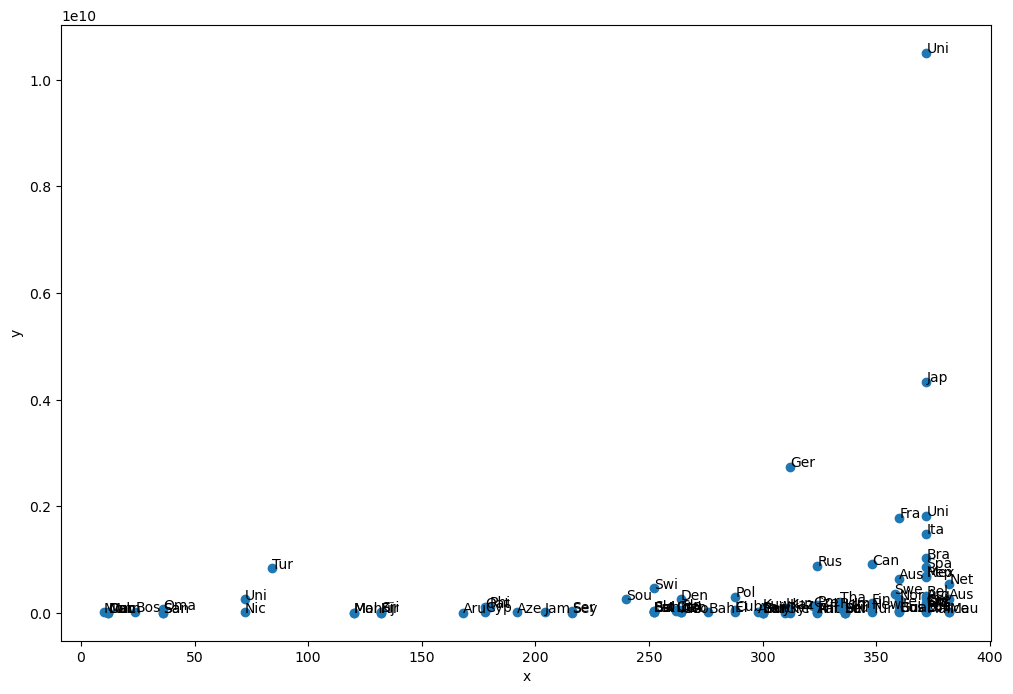

In [27]:
fig, ax = plt.subplots()
ax = dfNew.set_index('x')['y'].plot(style='o')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val'])[:3])

label_point(dfNew.x, dfNew.y, dfNew.val, ax)

dfNew.plot('x', 'y', kind='scatter', ax=ax, figsize=(12, 8))

Ok, so this plot needs a bit polishing, but this is something to be done in the data cleaning / plotting section.<br>
What information can you derive from this?